<a href="https://colab.research.google.com/github/RahulSinghPundir/K-Means-Clustring/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
# Importing numpy and pandas
import numpy as np
import pandas as pd

# Reading the dataset and creating a dataframe
df=pd.read_csv("https://raw.githubusercontent.com/RahulSinghPundir/K-Means-Clustring/main/Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [121]:
# We can observe that address feature is not valuable or our model do not need that
# Because we should not make cluster according to the address so we can leave/drop it 
df=df.drop("Address",axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [122]:
# We should remove null or nan values from our dataset
x=df.values[:,1:]
df=np.nan_to_num(x)

# For normalizing our data here we are using Standard Scalar
from sklearn.preprocessing import StandardScaler
df=StandardScaler().fit_transform(df)
print(df[:5,:])

[[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.52379654  0.39138677]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.90913822  1.59755385]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.52379654 -0.44250653]]


In [123]:
# Importing the KMeans cluster model
from sklearn.cluster import KMeans
model=KMeans(init="k-means++",n_clusters=3,n_init=12)
model.fit(df)

# Cheacking the label and centroids
labels=model.labels_
centroids=model.cluster_centers_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


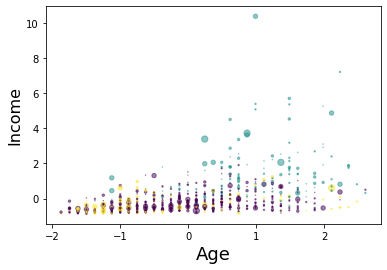

In [124]:
# Now look at the distribution based on the age and income
import matplotlib.pyplot as plt
area = np.pi * ( df[:, 1])**2  
plt.scatter(df[:, 0], df[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

In [125]:
# colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels))))
# fig=plt.figure(figsize=(10,6))
# ax=fig.add_subplot(1,1,1)
# print(model.cluster_centers_)
# for k,col in zip(range(len(centroids)),colors):
#   my_members=(k==labels)
#   center=centroids[k]
#   ax.plot(df[my_members,0],df[my_members,3],c='w',markerfacecolor=col,marker='.',markersize=10)
#   ax.plot(center[0], center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=10)
# plt.show()